## Select glaciers within region shapes and basic attributes: Level 2 files

L0 and L1 files are too large: they are selected roughly by lon lat boxes and a buffer, so there is a lot of duplication. Here we select glaciers by region by overlaying the glaciers representative points with the region outlines. This reduces the size of the files and make them ready for regional processing.

In addition, we compute glacier area and store the CenLon, CenLat attributes for later use.

In [9]:
from oggm import utils
import geopandas as gpd
import pandas as pd
import numpy as np
import shutil
import glob
import os
import subprocess
import tarfile
import shapely.geometry as shpg
import progressbar
import matplotlib.pyplot as plt
import warnings

In [10]:
def xy_coord(geom):
    x, y = rp.iloc[0].xy
    return x[0], y[0]

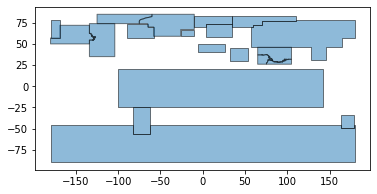

In [11]:
reg_file = 'zip://../l0_regions/00_rgi70_regions.zip/00_rgi70_regions/00_rgi70_O1Regions.shp'
reg_f = gpd.read_file(reg_file)
# We drop the second alaska box which is useless
reg_f = reg_f.drop(1)

In [8]:
idir = utils.mkdir('../l1_with_interiors')
odir = utils.mkdir('../l2_sel_reg')
odir_tar = utils.mkdir('../l2_sel_reg_tars')

for reg in range(1, 20):

    if reg == 13:
        continue
    
    fp = f'{idir}/RGI{reg:02d}/RGI{reg:02d}.shp'
    print(fp)
    print('Reading...')
    shp = gpd.read_file(fp)
    
    print('Pointing...')
    
    rp = shp.representative_point()
    
    coordinates = np.array(list(rp.apply(xy_coord)))
    shp['CenLon'] = coordinates[:, 0]
    shp['CenLat'] = coordinates[:, 1]
    
    rp = rp.to_frame('geometry')
    rp['orig_index'] = shp.index
    
    intersect = gpd.overlay(rp, reg_f.loc[reg_f.RGI_CODE == f'{reg:02d}'], how='intersection')
    
    odf = shp.loc[intersect['orig_index']]
    
    print('Area-ing...')
    odf['area'] = odf.to_crs({'proj':'cea'}).area
    
    dd = utils.mkdir(f'{odir}/RGI{reg:02d}/', reset=True)
    
    print('Writing...')
    odf.to_file(dd + f'RGI{reg:02d}.shp')
    
    print('Taring...')
    print(subprocess.run(['tar', '-zcvf', f'{odir_tar}/RGI{reg:02d}.tar.gz', '-C', odir, f'RGI{reg:02d}']))

../l1_with_interiors/RGI01/RGI01.shp
Reading...
Pointing...
Area-ing...
Writing...
Taring...
CompletedProcess(args=['tar', '-zcvf', '../l2_sel_reg_tars/RGI01.tar.gz', '-C', '../l2_sel_reg', 'RGI01'], returncode=0)
../l1_with_interiors/RGI02/RGI02.shp
Reading...
Pointing...
Area-ing...
Writing...
Taring...
CompletedProcess(args=['tar', '-zcvf', '../l2_sel_reg_tars/RGI02.tar.gz', '-C', '../l2_sel_reg', 'RGI02'], returncode=0)
../l1_with_interiors/RGI03/RGI03.shp
Reading...
Pointing...
Area-ing...
Writing...
Taring...
CompletedProcess(args=['tar', '-zcvf', '../l2_sel_reg_tars/RGI03.tar.gz', '-C', '../l2_sel_reg', 'RGI03'], returncode=0)
../l1_with_interiors/RGI04/RGI04.shp
Reading...
Pointing...
Area-ing...
Writing...
Taring...
CompletedProcess(args=['tar', '-zcvf', '../l2_sel_reg_tars/RGI04.tar.gz', '-C', '../l2_sel_reg', 'RGI04'], returncode=0)
../l1_with_interiors/RGI05/RGI05.shp
Reading...
Pointing...
Area-ing...
Writing...
Taring...
CompletedProcess(args=['tar', '-zcvf', '../l2_sel_r